In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
df = pd.read_csv("/kaggle/input/layoffs/layoffs.csv")
df_clean = df.copy()

df_clean = df_clean.drop_duplicates()

for col in ['company', 'industry', 'country']:
    df_clean[col] = df_clean[col].astype(str).str.strip()

df_clean['industry'] = df_clean['industry'].replace({
    'Crypto Currency': 'Crypto',
    'Cryptocurrency': 'Crypto'
})

df_clean['country'] = df_clean['country'].str.rstrip('.')
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

null_columns = ['funds_raised_millions', 'total_laid_off', 'percentage_laid_off']
for col in null_columns:
    df_clean[col] = df_clean[col].replace('NULL', np.nan)

df_clean['funds_raised_millions'] = pd.to_numeric(df_clean['funds_raised_millions'], errors='coerce')
df_clean['total_laid_off'] = pd.to_numeric(df_clean['total_laid_off'], errors='coerce')
df_clean['percentage_laid_off'] = pd.to_numeric(df_clean['percentage_laid_off'], errors='coerce')

df_clean['industry'] = df_clean['industry'].replace('', np.nan)
df_clean['industry'] = df_clean.groupby(['company', 'location'])['industry']\
                               .transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))

df_clean = df_clean[~(df_clean['total_laid_off'].isnull() & df_clean['percentage_laid_off'].isnull())]
df_clean = df_clean.reset_index(drop=True)

print(df_clean)

df_clean.to_csv("cleaned_layoffs.csv", index=False)

/tmp/ipykernel_36/1253321833.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  .transform(lambda x: x.fillna(method='bfill').fillna(method='ffill'))


            company        location        industry  total_laid_off  \
0         Atlassian          Sydney           Other           500.0   
1          SiriusXM   New York City           Media           475.0   
2            Alerzo          Ibadan          Retail           400.0   
3            UpGrad          Mumbai       Education           120.0   
4              Loft       Sao Paulo     Real Estate           340.0   
...             ...             ...             ...             ...   
1990   HopSkipDrive     Los Angeles  Transportation             8.0   
1991    Panda Squad     SF Bay Area        Consumer             6.0   
1992  Tamara Mellon     Los Angeles          Retail            20.0   
1993       EasyPost  Salt Lake City       Logistics            75.0   
1994      Blackbaud      Charleston           Other           500.0   

      percentage_laid_off       date     stage        country  \
0                    0.05 2023-03-06  Post-IPO      Australia   
1                

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [4]:

df_clean = pd.read_csv("cleaned_layoffs.csv")

df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean['year'] = df_clean['date'].dt.year
df_clean['month'] = df_clean['date'].dt.to_period('M')

max_laid_off = df_clean['total_laid_off'].max()
max_percentage_laid_off = df_clean['percentage_laid_off'].max()

highest_percentage = df_clean[df_clean['percentage_laid_off'] == 1].sort_values(by='funds_raised_millions', ascending=False)
top_companies_by_layoffs = df_clean.groupby('company')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)

date_range = (df_clean['date'].min(), df_clean['date'].max())

layoffs_by_industry = df_clean.groupby('industry')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)
layoffs_by_country = df_clean.groupby('country')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)
layoffs_by_year = df_clean.groupby('year')['total_laid_off'].sum().reset_index().sort_values(by='year', ascending=False)
layoffs_by_stage = df_clean.groupby('stage')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False)

monthly_layoffs = df_clean.groupby('month')['total_laid_off'].sum().reset_index()
monthly_layoffs['rolling_total'] = monthly_layoffs['total_laid_off'].cumsum()

company_year_layoffs = df_clean.groupby(['company', 'year'])['total_laid_off'].sum().reset_index()
company_year_layoffs['rank'] = company_year_layoffs.groupby('year')['total_laid_off'].rank(method='dense', ascending=False)
top_company_year_rank = company_year_layoffs[company_year_layoffs['rank'] <= 5]


In [5]:


print("\n=== MAXIMUMS ===")
print("Max Total Laid Off:", df_clean['total_laid_off'].max())
print("Max Percentage Laid Off:", df_clean['percentage_laid_off'].max())

print("\n=== HIGHEST % LAYOFFS (1.0) ===")
print(df_clean[df_clean['percentage_laid_off'] == 1].sort_values(by='funds_raised_millions', ascending=False)[['company', 'funds_raised_millions', 'total_laid_off']])

print("\n=== TOTAL LAYOFFS BY COMPANY ===")
print(df_clean.groupby('company')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False))

print("\n=== DATE RANGE ===")
print("From:", df_clean['date'].min().date(), "To:", df_clean['date'].max().date())

print("\n=== TOTAL LAYOFFS BY INDUSTRY ===")
print(df_clean.groupby('industry')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False))

print("\n=== TOTAL LAYOFFS BY COUNTRY ===")
print(df_clean.groupby('country')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False))

print("\n=== TOTAL LAYOFFS BY YEAR ===")
print(df_clean.groupby('year')['total_laid_off'].sum().reset_index().sort_values(by='year', ascending=False))

print("\n=== TOTAL LAYOFFS BY COMPANY STAGE ===")
print(df_clean.groupby('stage')['total_laid_off'].sum().reset_index().sort_values(by='total_laid_off', ascending=False))

print("\n=== MONTHLY LAYOFF TOTALS WITH ROLLING SUM ===")
monthly = df_clean.groupby('month')['total_laid_off'].sum().reset_index()
monthly['rolling_total'] = monthly['total_laid_off'].cumsum()
print(monthly)

print("\n=== COMPANY LAYOFFS BY YEAR ===")
company_year = df_clean.groupby(['company', 'year'])['total_laid_off'].sum().reset_index()
print(company_year.sort_values(by='total_laid_off', ascending=False))

print("\n=== TOP 5 COMPANIES PER YEAR BY LAYOFFS ===")
company_year['rank'] = company_year.groupby('year')['total_laid_off'].rank(method='dense', ascending=False)
top_company_years = company_year[company_year['rank'] <= 5]
print(top_company_years.sort_values(['year', 'rank']))



=== MAXIMUMS ===
Max Total Laid Off: 12000.0
Max Percentage Laid Off: 1.0

=== HIGHEST % LAYOFFS (1.0) ===
                  company  funds_raised_millions  total_laid_off
288           Britishvolt                 2400.0           206.0
1477                Quibi                 1800.0             NaN
590   Deliveroo Australia                 1700.0           120.0
1439              Katerra                 1600.0          2434.0
535               BlockFi                 1000.0             NaN
...                   ...                    ...             ...
1591           Dotscience                    NaN            10.0
1630           Airy Rooms                    NaN             NaN
1683                Stoqo                    NaN           250.0
1870           The Modist                    NaN             NaN
1982               Ejento                    NaN            84.0

[116 rows x 3 columns]

=== TOTAL LAYOFFS BY COMPANY ===
             company  total_laid_off
53            Ama

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


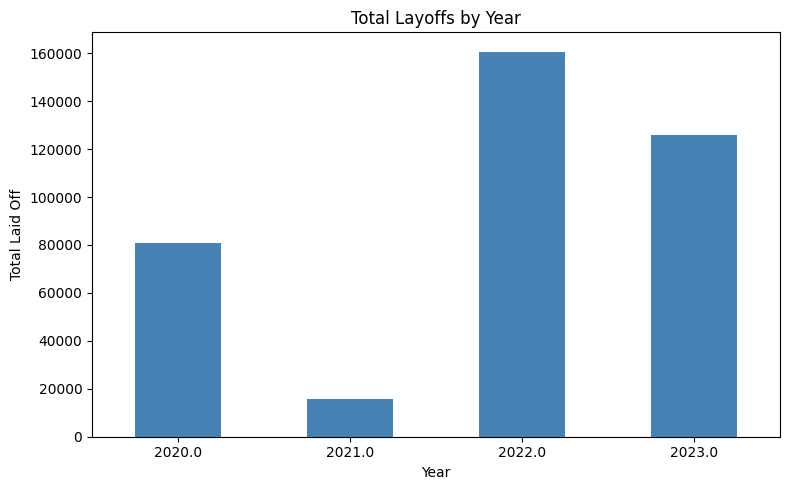

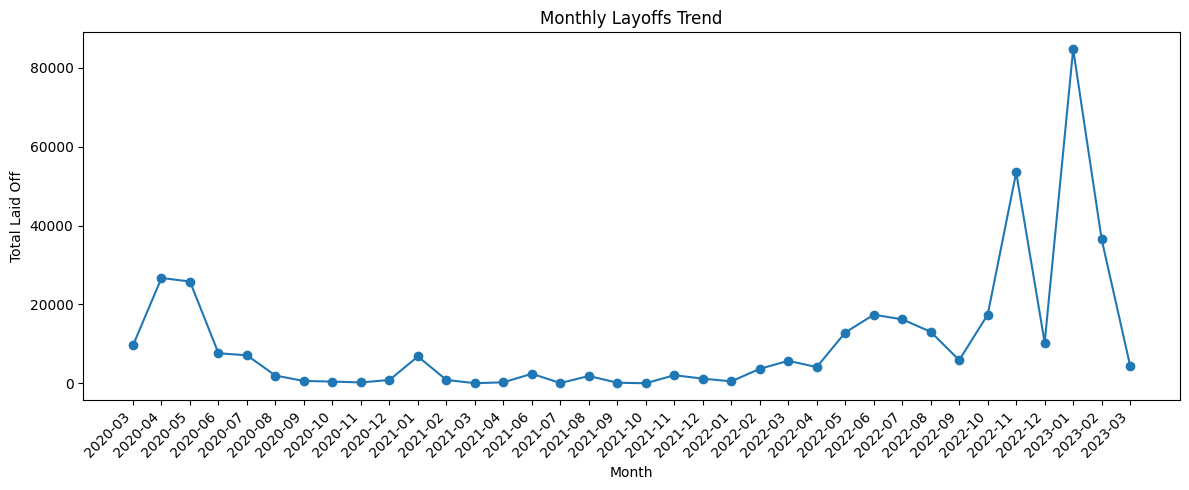

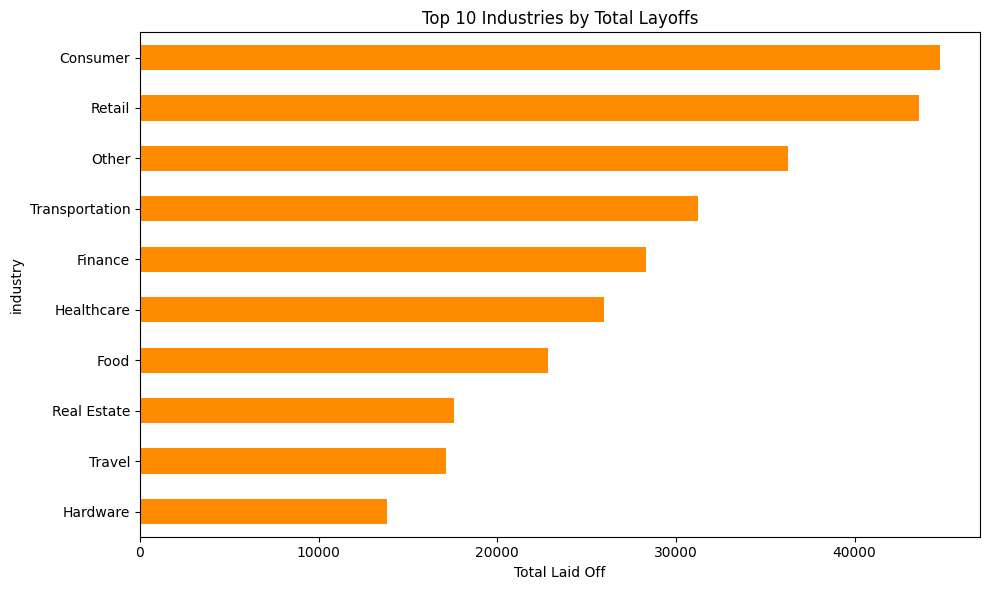

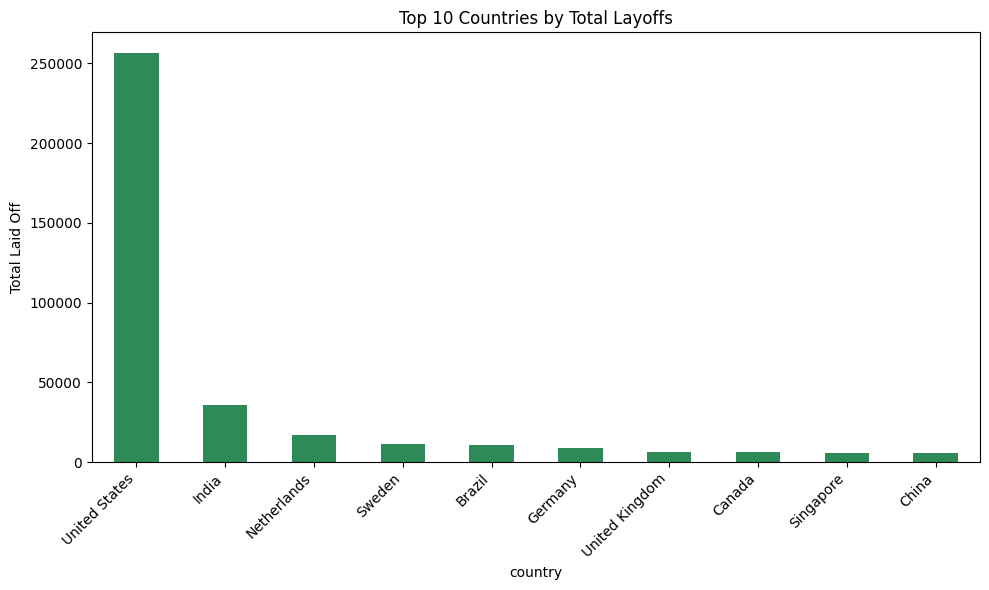

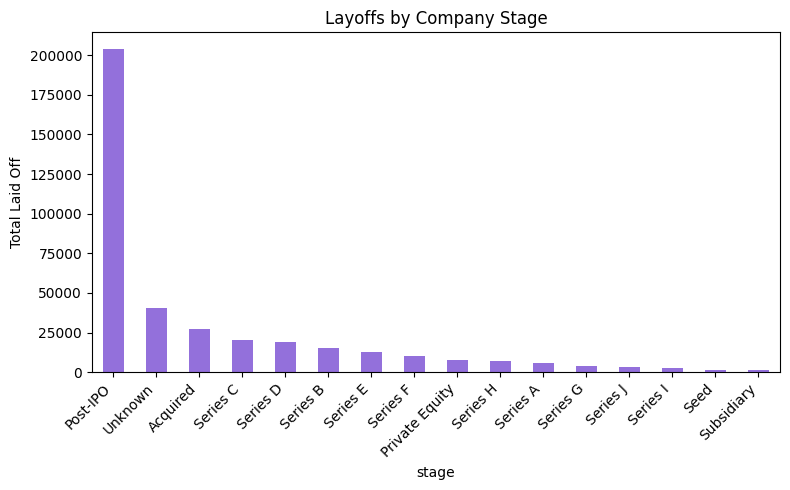

In [6]:
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_layoffs.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M')

# 1. Total layoffs by year
plt.figure(figsize=(8, 5))
df.groupby('year')['total_laid_off'].sum().plot(kind='bar', color='steelblue')
plt.title("Total Layoffs by Year")
plt.ylabel("Total Laid Off")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Monthly layoffs trend
monthly = df.groupby('month')['total_laid_off'].sum().reset_index()
monthly['month'] = monthly['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.plot(monthly['month'], monthly['total_laid_off'], marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')
plt.title("Monthly Layoffs Trend")
plt.xlabel("Month")
plt.ylabel("Total Laid Off")
plt.tight_layout()
plt.show()

# 3. Layoffs by industry
industry = df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
industry.plot(kind='barh', color='darkorange')
plt.title("Top 10 Industries by Total Layoffs")
plt.xlabel("Total Laid Off")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 4. Layoffs by country
country = df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
country.plot(kind='bar', color='seagreen')
plt.title("Top 10 Countries by Total Layoffs")
plt.ylabel("Total Laid Off")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Layoffs by funding stage
stage = df.groupby('stage')['total_laid_off'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
stage.plot(kind='bar', color='mediumpurple')
plt.title("Layoffs by Company Stage")
plt.ylabel("Total Laid Off")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
